In [1]:
#Primero cargo las librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [3]:
#despues cargo el data set
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [4]:
# Lee el archivo y muestra los primeros datos
CSV_PATH = 'winequality-red.csv'
df = pd.read_csv(CSV_PATH, sep=';')

print("Shape:", df.shape)
display(df.head())
print(df.dtypes)


Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# Pasar quality a 3 clases: Baja(0)=3-4, Media(1)=5-6, Alta(2)=7-8
bins = [0, 4, 6, 10]
labels = [0, 1, 2]
df['quality_cat'] = pd.cut(df['quality'], bins=bins, labels=labels, right=True).astype(int)

print("Distribución por clase (quality_cat):")
print(df['quality_cat'].value_counts().sort_index())

# X / y
X = df.drop(columns=['quality', 'quality_cat'])
y = df['quality_cat']

# Split 80/20 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Modelos
knn  = KNeighborsClassifier(n_neighbors=5, weights='uniform')
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Predicciones y métricas pedidas
y_pred_knn  = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

acc_knn  = accuracy_score(y_test, y_pred_knn)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_knn   = f1_score(y_test, y_pred_knn, average='macro')
f1_tree  = f1_score(y_test, y_pred_tree, average='macro')

print(f"\nAccuracy KNN:  {acc_knn:.4f} | F1-macro KNN:  {f1_knn:.4f}")
print(f"Accuracy Árbol:{acc_tree:.4f} | F1-macro Árbol:{f1_tree:.4f}")

print("\n--- Reporte KNN ---")
print(classification_report(y_test, y_pred_knn, digits=4, target_names=['Baja(0)','Media(1)','Alta(2)']))

print("\n--- Reporte Árbol ---")
print(classification_report(y_test, y_pred_tree, digits=4, target_names=['Baja(0)','Media(1)','Alta(2)']))


Distribución por clase (quality_cat):
quality_cat
0      63
1    1319
2     217
Name: count, dtype: int64

Accuracy KNN:  0.8094 | F1-macro KNN:  0.3952
Accuracy Árbol:0.8500 | F1-macro Árbol:0.4845

--- Reporte KNN ---
              precision    recall  f1-score   support

     Baja(0)     0.0000    0.0000    0.0000        13
    Media(1)     0.8527    0.9432    0.8957       264
     Alta(2)     0.3846    0.2326    0.2899        43

    accuracy                         0.8094       320
   macro avg     0.4125    0.3919    0.3952       320
weighted avg     0.7552    0.8094    0.7779       320


--- Reporte Árbol ---
              precision    recall  f1-score   support

     Baja(0)     0.0000    0.0000    0.0000        13
    Media(1)     0.8750    0.9545    0.9130       264
     Alta(2)     0.6452    0.4651    0.5405        43

    accuracy                         0.8500       320
   macro avg     0.5067    0.4732    0.4845       320
weighted avg     0.8086    0.8500    0.8259       

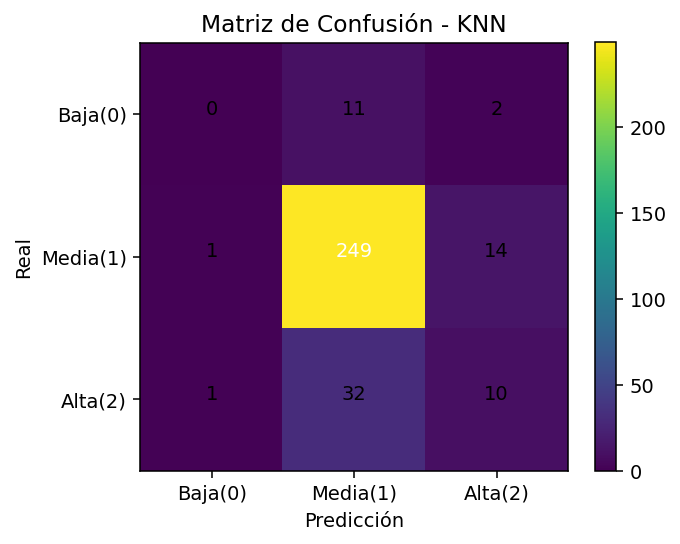

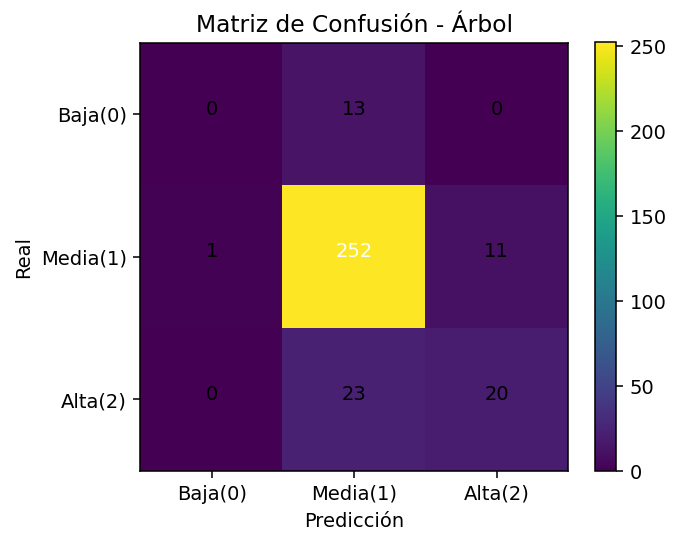

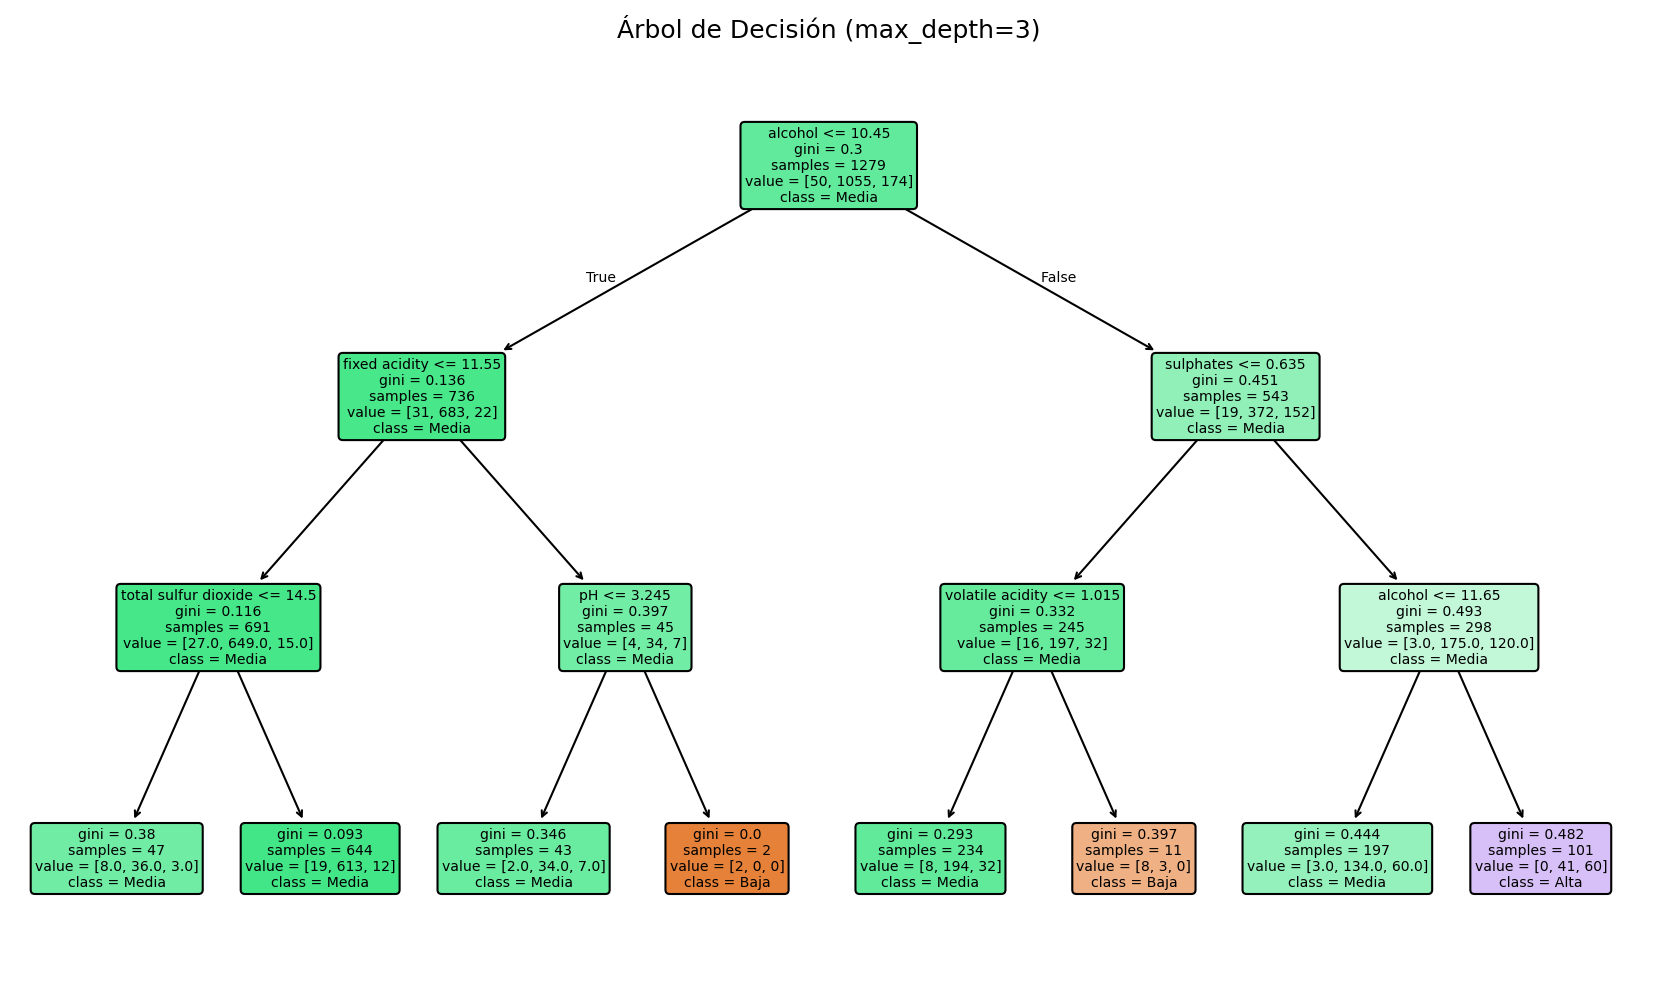

In [9]:
def plot_confusion(cm, classes, title):
    plt.figure(figsize=(5,4), dpi=140)
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.tight_layout()
    plt.show()

# Matrices
cm_knn  = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)

classes = ['Baja(0)','Media(1)','Alta(2)']
plot_confusion(cm_knn,  classes, 'Matriz de Confusión - KNN')
plot_confusion(cm_tree, classes, 'Matriz de Confusión - Árbol')

# Visualizar el árbol
plt.figure(figsize=(14,8), dpi=150)
plot_tree(
    tree,
    feature_names=X.columns.tolist(),
    class_names=['Baja','Media','Alta'],
    filled=True,
    rounded=True
)
plt.title('Árbol de Decisión (max_depth=3)')
plt.show()
